In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from DQN import Agent
import gym


### Load the lunar lander environment

In [2]:
env = gym.make("LunarLander-v2")
print("Number of elements in state space vector : ", env.observation_space.shape[0])
print("Number of actions there : ", env.action_space.n)

Number of elements in state space vector :  8
Number of actions there :  4


In Lunar environment state space vector contains 8 elements, they are :
* 0 - Lander horizontal coordinate
* 1 - Lander vertical coordinate
* 2 - Lander horizontal speed
* 3 - Lander vertical speed
* 4 - Lander angle
* 5 - Lander angular speed
* 6 - Bool: 1 if first leg has contact, else 0
* 7 - Bool: 1 if second leg has contact, else 0

There are four actions avaialbe in lunar lander environment, they are:
* 0 - No action
* 1 - Fire left engine
* 2 - Fire main engine
* 3 - Fire right engine

### Define the model parameters

In [3]:
discount_factor = 0.99
learning_rate = 0.00075
number_of_epochs = 500
mini_batch_size = 32
initial_epsilon_value = 1.0
epsilon_decay_value = 0.001
min_epsilon_value = 0.1
copy_rate = 120 # copy the main network to target network after every update rate number of iterations
number_of_actions = env.action_space.n
input_dim = env.observation_space.shape[0]

#### we have implemented our DQN model in `DQN/DQN.py`. Now let's create agent and train the DQN model

In [4]:
dqn_agent = Agent(lr=learning_rate, discount_factor=discount_factor, 
                  num_actions=number_of_actions, epsilon=initial_epsilon_value, 
                  batch_size=mini_batch_size, input_dims=input_dim, 
                  update_rate=copy_rate, epsilon_decay=epsilon_decay_value, epsilon_final=min_epsilon_value)

2021-12-16 18:31:14.570400: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-16 18:31:14.570626: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### For training the DQN model set `train=True` in the below cell or else we will load the trained model and inference the results.

2021-12-17 11:21:06.328 python[26866:3552689] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcefebc6a60>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-12-17 11:21:06.329 python[26866:3552689] Warning: Expected min height of view: (<NSButton: 0x7fcf01d31740>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-12-17 11:21:06.331 python[26866:3552689] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcf01d33700>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-12-17 11:21:06.333 python[26866:3552689] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcf01d34420>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


CPU times: user 6.76 s, sys: 737 ms, total: 7.5 s
Wall time: 12.4 s


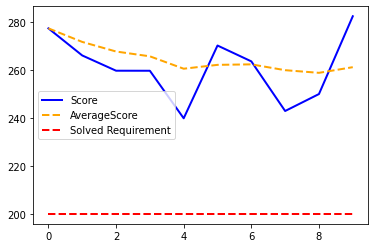

In [17]:
%%time
train=False

if train:
    episodes, scores, avg_scores, obj = dqn_agent.train_model(env, 5000, graph=True)
    plt.plot(scores, label="episode reward")
    plt.plot(avg_scores, label="average reward")
    plt.title("DQN")
else:
    # Load the trained model and inference the results
    file_type = 'tf'
    file = 'saved_networks/dqn_model0'
    dqn_agent.test(env, 10, file_type, file, True)
    

#### If you want to train run the below cell.

In [5]:
%%time
episodes, scores, avg_scores, obj = dqn_agent.train_model(env, 5000, graph=True)

2021-12-16 18:31:14.876126: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Episode 0/5000, Score: -322.7501496124823, AVG Score: -322.7501496124823
Episode 1/5000, Score: -296.92122887610714, AVG Score: -309.8356892442947
Episode 2/5000, Score: -90.58033245657049, AVG Score: -236.7505703150533
Episode 3/5000, Score: -148.55615974619866, AVG Score: -214.70196767283963
Episode 4/5000, Score: -597.593857786032, AVG Score: -291.2803456954781
Episode 5/5000, Score: -7.4221490293137435, AVG Score: -243.97064625111736
Episode 6/5000, Score: -238.6258340904791, AVG Score: -243.20710165674043
Episode 7/5000, Score: -97.65832335678247, AVG Score: -225.01350436924574
Episode 8/5000, Score: -369.0460333819393, AVG Score: -241.01711870398947
Episode 9/5000, Score: -113.26354539152072, AVG Score: -228.24176137274262
Episode 10/5000, Score: -108.25776325659426, AVG Score: -217.3341251803655
Episode 11/5000, Score: -87.58584102012722, AVG Score: -206.5217681670123
Episode 12/5000, Score: -155.5888238269702, AVG Score: -202.60384937162448
Episode 13/5000, Score: -237.24408256

2021-12-16 19:11:31.018991: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_networks/dqn_model0/assets
Network saved
CPU times: user 40min 38s, sys: 2min 38s, total: 43min 16s
Wall time: 40min 16s


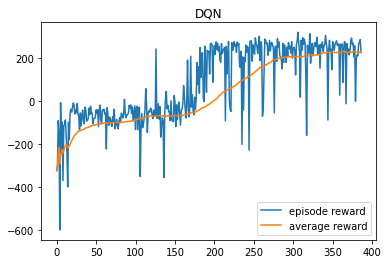

In [16]:
# Training results
plt.plot(scores, label="episode reward")
plt.plot(avg_scores, label="average reward")
plt.title("DQN")
plt.legend()
plt.show()

2021-12-17 12:21:34.640 python[26866:3552689] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcefef5f6c0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-12-17 12:21:34.640 python[26866:3552689] Warning: Expected min height of view: (<NSButton: 0x7fcefef8eb40>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-12-17 12:21:34.643 python[26866:3552689] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcefef8f1a0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-12-17 12:21:34.644 python[26866:3552689] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fceff08a8c0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


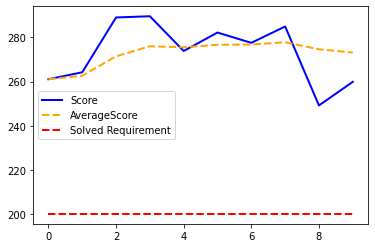

In [19]:
file_type = 'tf'
file = 'saved_networks/dqn_model0'
dqn_agent.test(env, 10, file_type, file, True)
